# Interconnect

Horizontal beam terminated with an anchored pad. Routes electrical signals between MEMS components.

In [1]:
import gdsfactory as gf
gf.gpdk.PDK.activate()  # Placeholder until custom PDK is implemented

# Layers — TODO update once custom PDK created
DPOLY   = (1, 0)  # doped poly-Si (structural MEMS)
PSG     = (2, 0)  # phosphosilicate glass (sacrificial)
UDPOLY  = (3, 0)  # undoped poly-Si (anchor)
UDOXIDE = (4, 0)  # undoped oxide (LTO)
METAL   = (5, 0)  # metal
SOI     = (6, 0)  # SOI silicon

In [2]:
def make_interconnect(
    beam_length: float = 50.0,
    beam_width: float = 1.5,
    anchor_size: float = 5.0,
    psg_inset: float = 1.0,
    struct_layer=DPOLY,
    sac_layer=PSG,
    anchor_si_layer=SOI,
):
    """Interconnect: horizontal beam terminated with an anchored pad.

    The beam runs from x=0 to x=beam_length.  An anchor pad of
    anchor_size x anchor_size is appended at the far end, centred
    vertically on the beam.

    Args:
        beam_length:    Length of the interconnect beam (um).
        beam_width:     Width of the interconnect beam (um).
        anchor_size:    Side length of the square anchor pad (um).
        psg_inset:      Inset of PSG window inside the anchor (um).
        struct_layer:   Structural poly-Si layer.
        sac_layer:      Sacrificial PSG layer.
        anchor_si_layer:SOI anchor layer.
    """
    ic = gf.Component()
    beam_mid_y = beam_width / 2

    # --- Beam ---
    ic.add_polygon(
        [(0, 0), (beam_length, 0),
         (beam_length, beam_width), (0, beam_width)],
        layer=struct_layer,
    )

    # --- Anchor pad (centred on beam) ---
    anchor = gf.Component()
    ax0 = beam_length
    ax1 = beam_length + anchor_size
    ay0 = beam_mid_y - anchor_size / 2
    ay1 = beam_mid_y + anchor_size / 2
    anchor_rect = [(ax0, ay0), (ax1, ay0), (ax1, ay1), (ax0, ay1)]
    anchor.add_polygon(anchor_rect, layer=struct_layer)
    anchor.add_polygon(anchor_rect, layer=anchor_si_layer)

    # PSG window
    anchor.add_polygon(
        [(ax0 + psg_inset, ay0 + psg_inset),
         (ax1 - psg_inset, ay0 + psg_inset),
         (ax1 - psg_inset, ay1 - psg_inset),
         (ax0 + psg_inset, ay1 - psg_inset)],
        layer=sac_layer,
    )

    ic.add_ref(anchor)
    return ic

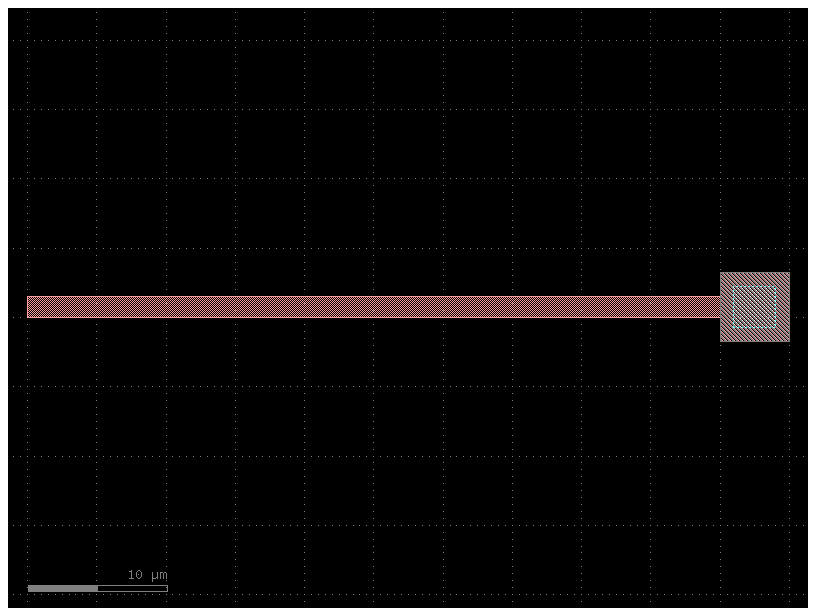

In [3]:
interconnect = make_interconnect()
interconnect.plot()